In [1]:
pip install pandas

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('car data.csv')

In [4]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
 df.shape

(301, 9)

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [9]:
#Checking null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [11]:
dataset = df[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [12]:
import datetime

In [13]:
dataset['Car_Age'] = dataset['Year'].apply(lambda x: int(datetime.datetime.now().date().strftime('%Y')) - x)

In [14]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [15]:
dataset.drop(['Year'], axis = 1, inplace = True)

In [16]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [17]:
final_dataset = pd.get_dummies(dataset,drop_first=True)

In [18]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [19]:
  final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Car_Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [20]:
import seaborn as sns

In [21]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [22]:
import seaborn as sns

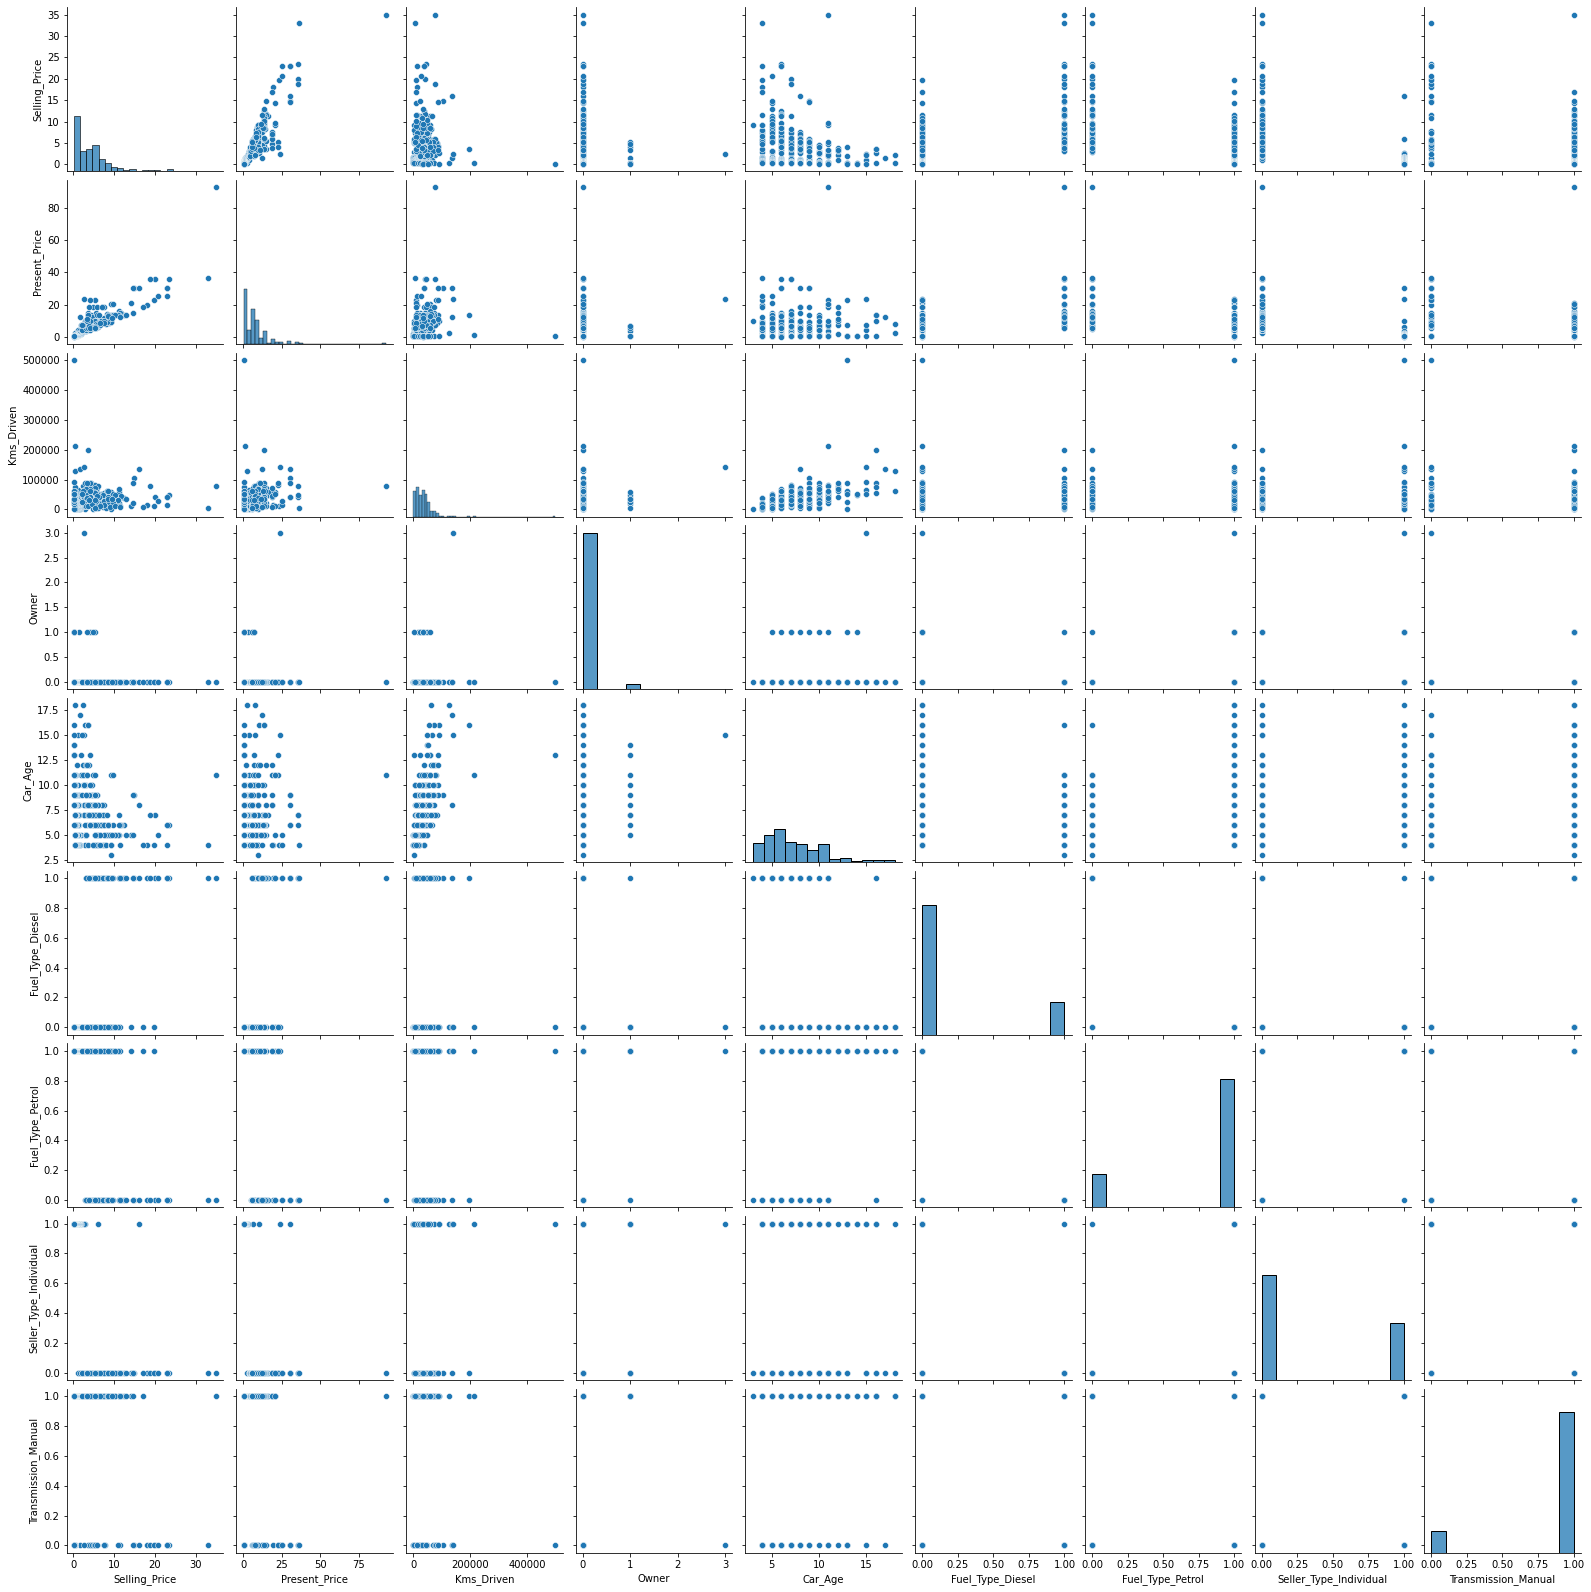

In [23]:
sns.pairplot(final_dataset)

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
topcorr = final_dataset.corr().index

<AxesSubplot:>

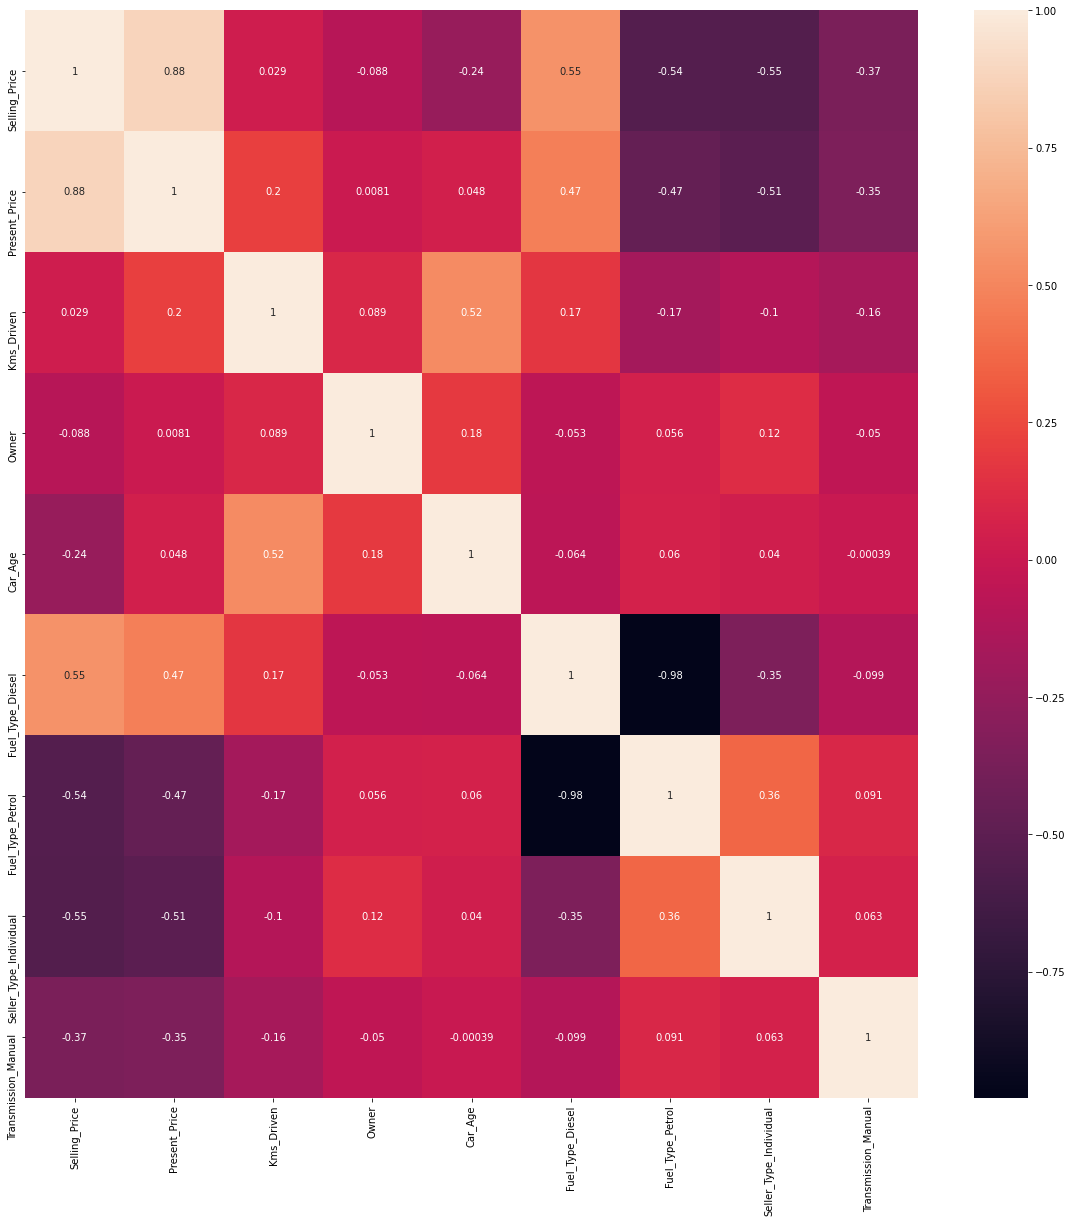

In [26]:
plt.figure(figsize = (20,20))
sns.heatmap(final_dataset.corr(), annot = True)

<AxesSubplot:>

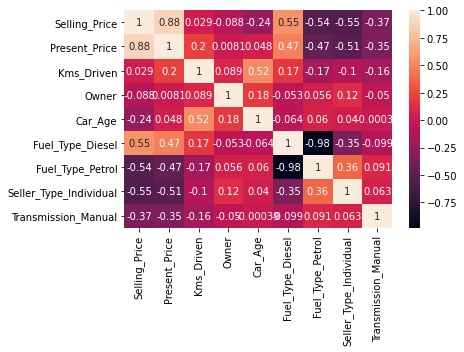

In [27]:
sns.heatmap(final_dataset[topcorr].corr(), annot = True)

In [28]:
#Selecting dependent and independent feature
X = final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [29]:
X.head()

,Present_Price,Kms_Driven,Owner,Car_Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [30]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [31]:
pip install sklearn

In [32]:
### Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [33]:
print(model.feature_importances_)

[0.39590384 0.04373054 0.00042109 0.074692   0.22106632 0.00851797
 0.12265856 0.13300969]


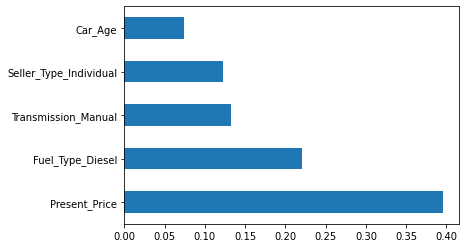

In [34]:
#Plotting the graph with feature importance for better visualization
feat_imp = pd.Series(model.feature_importances_, index=X.columns)
feat_imp.nlargest(5).plot(kind='barh') 
plt.show()

In [35]:
pd.Series(model.feature_importances_, index = X.columns).nlargest(5)

Present_Price             0.395904
Fuel_Type_Diesel          0.221066
Transmission_Manual       0.133010
Seller_Type_Individual    0.122659
Car_Age                   0.074692
dtype: float64

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2)

In [38]:
X_train.shape

(240, 8)

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
rf_random = RandomForestRegressor()

In [41]:
import numpy as np

In [42]:
#Hyperparameters
n_estimators= [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [43]:
#Randomized search CV
n_estimators= [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

max_depth= [int(x) for x in np.linspace(start = 5, stop = 30, num = 6)]

min_samples_split=[2, 5, 10, 15, 100]

min_samples_leaf=[1, 2, 5, 10]

max_features= ['auto','sqrt']

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
#Create de Random Grid
random_grid = {'n_estimators':n_estimators,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'max_features':max_features}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10], 'max_features': ['auto', 'sqrt']}


In [46]:
#Using random grid to search for the best parameters
#First reate the base model to tune

rf = RandomForestRegressor()

In [47]:
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid, n_iter=10, scoring='neg_mean_squared_error', n_jobs=1, cv=5, verbose=2, random_state=42)

In [48]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [49]:
predictions = rf_random.predict(X_test)

In [50]:
predictions

array([10.97872789,  9.97493615,  4.92934493,  0.32783416,  4.13892153,
        5.72901828,  5.77404936,  1.15324445,  0.242175  ,  2.80637743,
       11.27366251,  0.29638605,  4.02904867,  0.49418155, 21.24788614,
        2.9978861 ,  0.32237185,  4.18970152,  0.51744024,  0.43317403,
       16.16445201,  4.45837029,  2.68273743,  5.43287206,  4.85231267,
        9.70990371,  0.6583382 , 20.41815372,  4.5395213 ,  8.37616847,
        5.51648326,  0.52949254,  4.82654842,  0.65613636,  4.44138164,
        5.54865427,  4.28761204,  6.2955684 ,  2.90652635,  0.6603681 ,
        0.52949254,  7.89198925,  4.50860474,  0.65922212,  0.65457566,
        1.28352129,  0.28108873,  7.43991885,  0.43394686, 10.9809831 ,
       21.3086498 ,  8.37616847,  2.51022289,  9.31200226,  3.47763158,
        6.28426094,  4.83543572,  0.38652174,  0.65922212,  6.0754376 ,
        7.71560974])

c:\users\alberto\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

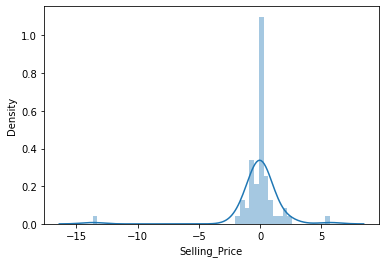

In [51]:
sns.distplot(y_test - predictions)

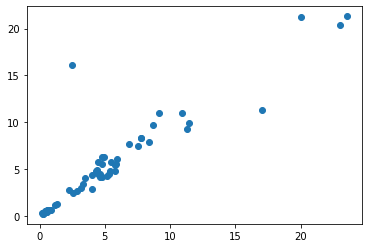

In [52]:
plt.scatter(y_test, predictions)

In [53]:
import pickle
#open a file, where you want to store the data
file = open('random_forest_model.pkl', 'wb')

#dumb model info to file
pickle.dump(rf_random, file)

In [54]:
rf_random

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)